In [48]:
# scipy模块 https://www.cnblogs.com/bawu/p/9036286.html
#hstack/column_stack，linalg.eig/linalg.eigh 参考链接  https://blog.csdn.net/lanchunhui/article/details/55657020

In [41]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import model_selection, mixture, metrics, datasets
import matplotlib.pyplot as plt
from matplotlib import colors, patches
from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
%config IPCompleter.greedy=True

# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [13]:
def generate_data():
    np.random.seed(0)
    cov1 = np.diag((1, 2))
    N1 = 500
    N2 = 300
    N = N1 + N2
    x1 = np.random.multivariate_normal(mean=(3, 2), cov=cov1, size=N1)
    m = np.array([[1, 1], [1, 3]])
    x1 = np.dot(x1, m)
    x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
    x = np.vstack((x1, x2))
    y = np.array([0] * N1 + [1] * N2)
    return x, y
    

In [15]:
x, y = generate_data()

In [6]:
np.array([[1, 1], [1, 3]])

array([[1, 1],
       [1, 3]])

<Figure size 648x648 with 0 Axes>

Text(0.5, 0.98, 'GMM/DPGMM比较')

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

【预测均值:】
 [[-0.98543679 10.0756839 ]
 [ 6.0239399  11.61448122]
 [ 3.77430768  5.86579463]]
【预测协方差:】
 [[[ 0.89079177 -0.02572518]
  [-0.02572518  1.95106592]]

 [[ 1.6667472   3.58655076]
  [ 3.58655076 10.40673433]]

 [[ 1.5383593   3.21210121]
  [ 3.21210121  9.04107582]]]


Text(0.5, 1.0, 'GMM')

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=5,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10,
                        weight_concentration_prior_type='dirichlet_process')

【预测均值:】
 [[ 4.8781165   8.69857677]
 [-0.97330341 10.07291054]
 [ 2.67198994  9.1912555 ]]
【预测协方差:】
 [[[ 2.88512063  6.60505025]
  [ 6.60505025 17.9282858 ]]

 [[ 0.96312229 -0.02851494]
  [-0.02851494  1.98150421]]

 [[ 5.1054577   1.12831439]
  [ 1.12831439  6.18430272]]]


Text(0.5, 1.0, 'DPGMM')

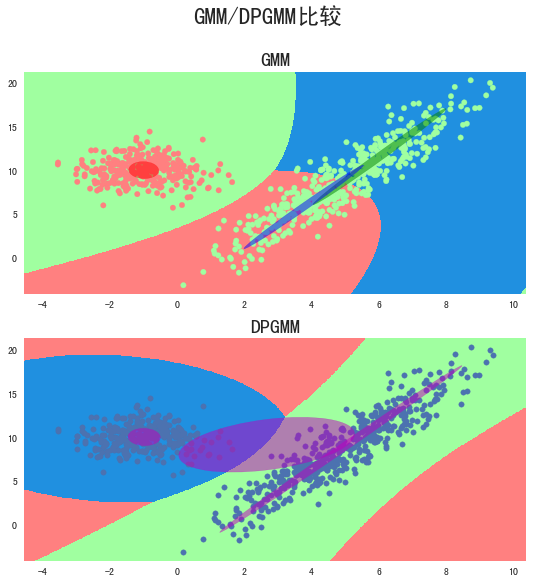

In [81]:

# Colormap 绘图使用

cm = colors.ListedColormap(['#A0FFA0', '#2090E0', '#FF8080'])
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
axis_x = np.linspace(x1_min, x1_max, 500)
axis_y = np.linspace(x2_min, x2_max, 500)

# 构造网格 500*500个点组成的网格
axis_x, axis_y = np.meshgrid(axis_x, axis_y)
# 500 * 500 个点
grid_test = np.stack([axis_x.ravel(), axis_y.ravel()], axis=1)

# 这两句与上面两句等价
# axis_x, axis_y = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
# grid_test = np.stack((axis_x.flat, axis_y.flat), axis=1)

# 使用高斯混合进行分类
# 高斯混合的组分数
n_components = 3
plt.figure(figsize=(9, 9), facecolor='w')
plt.suptitle('GMM/DPGMM比较', fontsize=23)
ax = plt.subplot(211)
gmm = mixture.GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(x)
centers = gmm.means_
covs = gmm.covariances_
print('【预测均值:】\n', gmm.means_)
print('【预测协方差:】\n', gmm.covariances_)

# 预测数据属于哪个组分
y_hat = gmm.predict(x)
grid_test_hat = gmm.predict(grid_test).reshape(axis_x.shape)
plt.pcolormesh(axis_x, axis_y, grid_test_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

clrs = list('rgbmy')
for i, cc in enumerate(zip(centers, covs)):
    center, cov = cc
    # eigh 用于矩阵分解
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180* np.arctan(v[1] / v[0]) / np.pi
    e = patches.Ellipse(xy=center, width=width, height=height,
                angle=angle, color=clrs[i], alpha=0.5, clip_box = ax.bbox)
    ax.add_artist(e)
# ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
# plt.xlim((x1_min, x1_max))
# plt.ylim((x2_min, x2_max))
plt.title(u'GMM', fontsize=20)
plt.grid(True)


# 使用贝叶斯高斯混合分类
dpgmm = mixture.BayesianGaussianMixture(n_components=n_components, 
                                        n_init=5, 
                                        weight_concentration_prior_type='dirichlet_process',
                                        weight_concentration_prior=10,
                                        max_iter=1000)
dpgmm.fit(x)
centers = dpgmm.means_
covs = dpgmm.covariances_
print('【预测均值:】\n', dpgmm.means_)
print('【预测协方差:】\n', dpgmm.covariances_)

y_hat = dpgmm.predict(x)
grid_test_hat = dpgmm.predict(grid_test).reshape(axis_x.shape)

ax = plt.subplot(212)
plt.pcolormesh(axis_x, axis_y, grid_test_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], cmap=cm, s=30, marker='o')
for i, cc in enumerate(zip(centers, covs)):
    center, cov = cc
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180 * np.arctan(v[1]/v[0]) / np.pi
    e = patches.Ellipse(xy=center, 
                        width=width, 
                        height=height, 
                        angle=angle, 
                        color='m', 
                        alpha=0.5, 
                        clip_box=ax.bbox
                       )
    ax.add_artist(e)
plt.title('DPGMM', fontsize=20)
plt.show()

In [19]:
x[:, 0].min()

-3.5412388076882246

In [63]:
X = np.random.randn(3, 3)
X
# 取上三角
X = np.triu(X)
print('--------' * 5 + '11' * 6)
X

print('--------' * 5 + '22' * 6)
# 提取对角线上的元素
X.diagonal()
# 构造只有对角线元素的矩阵 其他位置都为0
np.diag(X.diagonal())

# 构造对称矩阵 X
X += (X.T-np.diag(X.diagonal()))
print('--------' * 5 + '33' * 6 )
X
# 矩阵分解                    
Lambda1, Q1 = np.linalg.eig(X)  
Lambda2, Q2 = np.linalg.eigh(X)

print('---矩阵分解111' * 6)
# print(np.linalg.eig(X))
np.linalg.eig(X)  
print('----矩阵分解222' * 6)
np.linalg.eigh(X)

array([[ 0.99540011,  0.61944727, -1.87328904],
       [ 0.16727438,  1.11341427,  1.80645032],
       [ 0.07381368,  0.87921936, -0.09212158]])

----------------------------------------111111111111


array([[ 0.99540011,  0.61944727, -1.87328904],
       [ 0.        ,  1.11341427,  1.80645032],
       [ 0.        ,  0.        , -0.09212158]])

----------------------------------------222222222222


array([ 0.99540011,  1.11341427, -0.09212158])

array([[ 0.99540011,  0.        ,  0.        ],
       [ 0.        ,  1.11341427,  0.        ],
       [ 0.        ,  0.        , -0.09212158]])

----------------------------------------333333333333


array([[ 0.99540011,  0.61944727, -1.87328904],
       [ 0.61944727,  1.11341427,  1.80645032],
       [-1.87328904,  1.80645032, -0.09212158]])

---矩阵分解111---矩阵分解111---矩阵分解111---矩阵分解111---矩阵分解111---矩阵分解111


(array([-2.44521394,  1.67507524,  2.7868315 ]),
 array([[ 0.48689225, -0.70406212, -0.51694532],
        [-0.46127366, -0.70983584,  0.5323154 ],
        [ 0.74172943,  0.02072699,  0.67037888]]))

----矩阵分解222----矩阵分解222----矩阵分解222----矩阵分解222----矩阵分解222----矩阵分解222


(array([-2.44521394,  1.67507524,  2.7868315 ]),
 array([[-0.48689225,  0.70406212, -0.51694532],
        [ 0.46127366,  0.70983584,  0.5323154 ],
        [-0.74172943, -0.02072699,  0.67037888]]))

In [ ]:
np.dot()

<Figure size 648x648 with 0 Axes>

Text(0.5, 0.98, 'GMM/DPGMM比较')

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

GMM均值 = 
 [[-0.98543679 10.0756839 ]
 [ 6.0239399  11.61448122]
 [ 3.77430768  5.86579463]]
GMM方差 = 
 [[[ 0.89079177 -0.02572518]
  [-0.02572518  1.95106592]]

 [[ 1.6667472   3.58655076]
  [ 3.58655076 10.40673433]]

 [[ 1.5383593   3.21210121]
  [ 3.21210121  9.04107582]]]


(-4.541238807688225, 10.395805567522181)

(-4.111828445244992, 21.365185200715473)

Text(0.5, 1.0, 'GMM')

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=5,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10,
                        weight_concentration_prior_type='dirichlet_process')

DPGMM均值 = 
 [[ 4.8781165   8.69857677]
 [-0.97330341 10.07291054]
 [ 2.67198994  9.1912555 ]]
DPGMM方差 = 
 [[[ 2.88512063  6.60505025]
  [ 6.60505025 17.9282858 ]]

 [[ 0.96312229 -0.02851494]
  [-0.02851494  1.98150421]]

 [[ 5.1054577   1.12831439]
  [ 1.12831439  6.18430272]]]


(-4.541238807688225, 10.395805567522181)

(-4.111828445244992, 21.365185200715473)

Text(0.5, 1.0, 'DPGMM')

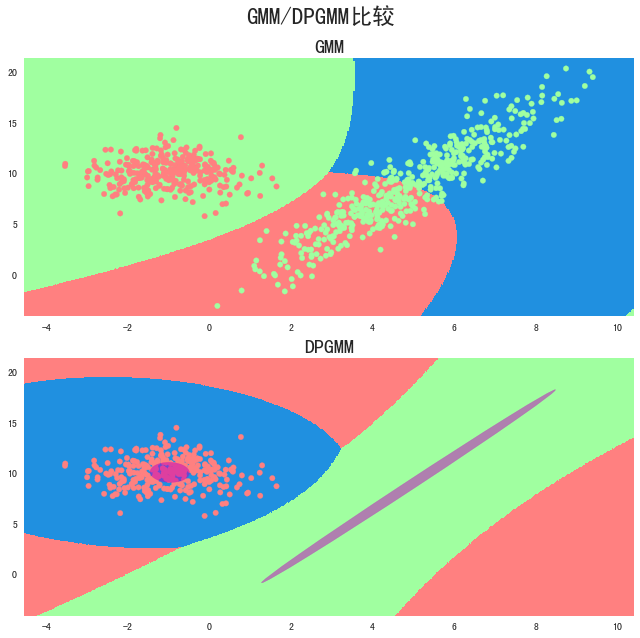

In [73]:
np.random.seed(0)
cov1 = np.diag((1, 2))
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(3, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0]*N1 + [1]*N2)
n_components = 3

# 绘图使用
colors_ = '#A0FFA0', '#2090E0', '#FF8080'
cm = colors.ListedColormap(colors_)
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)

plt.figure(figsize=(9, 9), facecolor='w')
plt.suptitle(u'GMM/DPGMM比较', fontsize=23)

ax = plt.subplot(211)
gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(x)
centers = gmm.means_
covs = gmm.covariances_
print ('GMM均值 = \n', centers)
print ('GMM方差 = \n', covs)
y_hat = gmm.predict(x)

grid_hat = gmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

clrs = list('rgbmy')
for i, cc in enumerate(zip(centers, covs)):
    center, cov = cc
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180* np.arctan(v[1] / v[0]) / np.pi
    e = patches.Ellipse(xy=center, width=width, height=height,
                angle=angle, color=clrs[i], alpha=0.5, clip_box = ax.bbox)
    ax.add_artist(e)

ax1_min, ax1_max, ax2_min, ax2_max = plt.axis()
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM', fontsize=20)
plt.grid(True)

# DPGMM
dpgmm = mixture.BayesianGaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000, n_init=5,
                                weight_concentration_prior_type='dirichlet_process', weight_concentration_prior=10)
dpgmm.fit(x)
centers = dpgmm.means_
covs = dpgmm.covariances_
print ('DPGMM均值 = \n', centers)
print ('DPGMM方差 = \n', covs)
y_hat = dpgmm.predict(x)
# print y_hat

ax = plt.subplot(212)
grid_hat = dpgmm.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, grid_hat, cmap=cm)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

for i, cc in enumerate(zip(centers, covs)):
    if i not in y_hat:
        continue
    center, cov = cc
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180* np.arctan(v[1] / v[0]) / np.pi
    e = patches.Ellipse(xy=center, width=width, height=height,
                angle=angle, color='m', alpha=0.5, clip_box = ax.bbox)
    ax.add_artist(e)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('DPGMM', fontsize=20)
plt.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()